In [1]:
import numpy as np
import pandas as pd
import requests
import csv
import ssl
from urllib.request import urlopen
from urllib.parse import quote_plus

In [2]:
pd.set_option('display.max_columns', None)

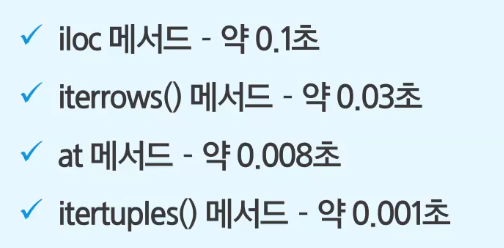

In [3]:
codi = pd.read_csv('./musinsa_codi.csv')

In [4]:
codi.head()

codiId codiStyle  codiTitle  \
0   13473    casual  오늘의 추천 코디   
1   13472    casual    편하게 꾸미기   
2   13471    casual     끌리는 매력   
3   13470    casual     컬러 포인트   
4   13469    casual     간편한 외출   

                                        codiContents        date viewCnt  \
0    편하게 입기 좋은 카고 팬츠에 스웨트셔츠를 스타일링하고 스니커즈로 마무리한 캐주얼 룩  2022.03.11   2,499   
1  그래픽이 돋보이는 반팔 티셔츠에 윈드브레이커를 매치한 후 벌룬 핏 팬츠로 마무리한 캐주얼  2022.03.11   2,317   
2  모노 톤의 윈드브레이커에 카라 티셔츠와 조거 팬츠를 스타일링하고 스니커즈, 볼캡으로...  2022.03.11   1,669   
3  그린 컬러가 돋보이는 나일론 재킷에 스웨트 셋업을 매치한 후 스니커즈로 포인트를 준...  2022.03.11   1,153   
4       그래픽이 돋보이는 스웨트셔츠와 트레이닝 팬츠를 코디하고 비니로 완성한 캐주얼 룩  2022.03.11   2,138   

                                              imgSrc  \
0  //image.msscdn.net/images/codimap/list/l_3_202...   
1  //image.msscdn.net/images/codimap/list/l_3_202...   
2  //image.msscdn.net/images/codimap/list/l_3_202...   
3  //image.msscdn.net/images/codimap/list/l_3_202...   
4  //image.msscdn.net/images/codimap/list/l_3_202...   

                                            hashtags  \
0         ['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지']   
1  ['그래픽', '벌룬핏', '오버핏', '편안한', '캠퍼스', '신학기', '꾸안꾸']   
2                    ['모노톤', '편안한', '원마일웨어', '와이드핏']   
3   ['체크', '편안한', '셋업코디', '원마일웨어', '컬러포인트', '레이어드룩']   
4              ['그래픽', '편안한', '원마일웨어', '핀턱', '와이드핏']   

                                             clothes  
0  [['2053541', '트래블', '워시드 후드 윈드 브레이커 차콜', '//im...  
1  [['2340867', '트래블', '써밋 후드 윈드 브레이커 사파이어 블루', '...  
2  [['2340573', '트래블', '고프 후드 윈드 브레이커 그레이', '//im...  
3  [['2340569', '트래블', '고프 후드 윈드 브레이커 옐로우 그린', '/...  
4  [['1285424', '트래블', '어프로칭 후드 윈드 브레이커 블랙', '//i...

### Codi.codiStyle 전처리

In [5]:
codi.codiStyle.unique()

array(['casual', 'americancasual', 'chic', 'dandy', 'formal', 'girlish',
       'sports', 'golf', 'romantic', 'street', 'retro'], dtype=object)

### Codi.viewCnt 전처리

In [6]:
codi.viewCnt = codi.viewCnt.apply(lambda x: x.replace(",", ""))
codi.viewCnt = codi.viewCnt.astype('int')

In [7]:
codi.describe()

codiId       viewCnt
count  11417.000000  11417.000000
mean    6674.732154   1630.148112
std     3891.766057   1495.100978
min        1.000000     87.000000
25%     3264.000000    787.000000
50%     6675.000000   1237.000000
75%    10034.000000   1989.000000
max    13473.000000  28354.000000

### Codi.hashtags 전처리

In [8]:
a = []
cnt = 0
for i in codi.hashtags:
    a += i.split(',')
    cnt += 1
a = pd.DataFrame(a)
a[0] = a[0].apply(lambda x: x.replace("'", ""))
a[0] = a[0].apply(lambda x: x.replace("[", ""))
a[0] = a[0].apply(lambda x: x.replace("]", ""))
a[0] = a[0].apply(lambda x: x.replace(" ", ""))
hashtag_list = a[0].unique()

In [9]:
hashtag_list

array(['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지', '벌룬핏', '편안한', '캠퍼스',
       '신학기', '모노톤', '원마일웨어', '체크', '셋업코디', '컬러포인트', '레이어드룩', '핀턱',
       '로고플레이', '아가일', '워싱', '남친룩', '코듀로이', '메쉬', '레터링', '퀼팅', '콜라보',
       '스티치', '슬릿', '맥시', '플라워', '크롭', '미니멀', '데이트', '컬러블록', '에코', '청청패션',
       '레더', '비비드', '뉴트럴톤', '레귤러핏', '루즈핏', '부츠컷', '키높이', '파스텔', '화사한',
       '피크닉', '스트라이프', '리버서블', '시티보이룩', '테이퍼드핏', '슬림핏', '플리츠', '귀여운',
       '폭염', '찢청', '페인팅', '카무플라주', '와펜', '밀리터리', '데미지', '럭셔리', '패치워크',
       '유니크', '리조트룩', '네온', '캐릭터', '타이다이', '페이즐리', '린넨', '날염', '시스루',
       '올블랙', '그라데이션', '짧치', '플리스', '비', '톤온톤', '심볼', '애니멀', '스트링',
       '아메카지', '비건패션', '스웨이드', '얼죽코', '퍼', '영캐주얼', '명절', '레오퍼드', '할로윈',
       '미세먼지', '스키니', '믹스매치', '셀럽템', '환절기', '셔링', '글로시', '퍼프소매', '한파',
       '캠핑', '올화이트', '하이웨이스트', '트위드', '앙고라', '래글런', '크로셰', '여친룩', '시폰',
       '빅카라', '여행', '크리스마스', '벨루어', '힙합', '', '오프숄더', '트로피컬', '도트', '레이스',
       '펀칭', 'SELF_LOVE', '페스티벌', '프레피룩', '테니스', '에스닉룩', '라탄', '큐빅',
       '

In [10]:
codi.hashtags[0]

"['그래픽', '꾸안꾸', '오버핏', '와이드핏', '카고', '빈티지']"

In [11]:
codi.hashtags = codi.hashtags.apply(lambda x: x.replace("['", "").replace("']", "").replace("'", "").replace(" ", "").split(','))

In [12]:
codi.insert(7, "codiOther", 0,  True)
codi.insert(7, "codiGolf", 0, True)
codi.insert(7, "codiHip", 0, True)
codi.insert(7, "codiInterview", 0, True)
codi.insert(7, "codiSports", 0, True)
codi.insert(7, "codiBusiness", 0, True)
codi.insert(7, "codiWedding", 0, True)
codi.insert(7, "codiTravel", 0, True)
codi.insert(7, "codiParty", 0, True)
codi.insert(7, "codiCampus", 0, True)
codi.insert(7, "codiDaily", 0, True)
codi.insert(7, "codiDate", 0, True)

In [13]:
codi.codiOther

0        0
1        0
2        0
3        0
4        0
        ..
11412    0
11413    0
11414    0
11415    0
11416    0
Name: codiOther, Length: 11417, dtype: int64

In [14]:
date = {'레이어드룩', '데이트', '캠퍼스', '남친룩', '피크닉', '여친룩', '소개팅', '퍼프소매', '아메카지', '청청패션', '스웨이드', '단아한'}
daily = {'스티치', '꾸안꾸', '에코', '편안한', '원마일웨어', '레더', '영캐주얼', '청청패션', '네온', '클래식', '시티보이룩', '아메카지', '벨루어', '스키니', '믹스매치', '찢청'}
campus = {'신학기', '캠퍼스', '얼죽코', '소개팅', '레이어드룩'}
party = {'할로윈', '페스티벌', '크리스마스', '파티'}
travel = {'남친룩', '피크닉', '편안한', '린넨', '캠핑', '단아한', '트로피컬', '여행', '리조트룩'}
wedding = {'미니멀', '상견례', '단정한', '하객', '격식', '우아한'}
business = {'핀턱', '미니멀', '쿨비즈', '출근룩', '단정한', '격식', '면접'}
sports = {'편안한', '원마일웨어', '스포티', '테니스', '레저스포츠', '네온', '보더룩', '캠핑', '애슬레저룩', '등산', '요가', '수영'}
interview = {'미니멀', '면접', '격식', '단정한'}
hip = {'오버핏', '벌룬핏', '크롭', '그래픽', '스트링', '유니크', '힙합', '타이다이', '패치워크', '레오퍼드', '페인팅', '데미지', '하이틴룩'}
golf = {'테니스'}

In [15]:
a = set(codi.hashtags[0])
if a.intersection(date):
    print(a)

In [16]:
codi['hashtags']

0                 [그래픽, 꾸안꾸, 오버핏, 와이드핏, 카고, 빈티지]
1            [그래픽, 벌룬핏, 오버핏, 편안한, 캠퍼스, 신학기, 꾸안꾸]
2                        [모노톤, 편안한, 원마일웨어, 와이드핏]
3           [체크, 편안한, 셋업코디, 원마일웨어, 컬러포인트, 레이어드룩]
4                    [그래픽, 편안한, 원마일웨어, 핀턱, 와이드핏]
                          ...                   
11412    [크롭, 로고플레이, 찢청, 페스티벌, 유니크, 와이드핏, 컬러포인트]
11413           [타이다이, 스트라이프, 스티치, 카고, 유니크, 비비드]
11414                   [힙합, 유니크, 카고, 타이다이, 키높이]
11415                       [컬러블록, 유니크, 카고, 오버핏]
11416              [컬러블록, 유니크, 비비드, 로고플레이, 타이다이]
Name: hashtags, Length: 11417, dtype: object

In [17]:
set(codi.loc[1].hashtags).intersection(date)

{'캠퍼스'}

In [18]:
codi.columns

Index(['codiId', 'codiStyle', 'codiTitle', 'codiContents', 'date', 'viewCnt',
       'imgSrc', 'codiDate', 'codiDaily', 'codiCampus', 'codiParty',
       'codiTravel', 'codiWedding', 'codiBusiness', 'codiSports',
       'codiInterview', 'codiHip', 'codiGolf', 'codiOther', 'hashtags',
       'clothes'],
      dtype='object')

In [19]:
# 각각의 스타일에 맞게 1 지정
codi.codiDate = codi.apply(lambda x: 1 if set(x.hashtags).intersection(date) else x.codiDate, axis=1)
codi.codiDaily = codi.apply(lambda x: 1 if set(x.hashtags).intersection(daily) else x.codiDaily, axis=1)
codi.codiCampus = codi.apply(lambda x: 1 if set(x.hashtags).intersection(campus) else x.codiCampus, axis=1)
codi.codiParty = codi.apply(lambda x: 1 if set(x.hashtags).intersection(party) else x.codiParty, axis=1)
codi.codiTravel = codi.apply(lambda x: 1 if set(x.hashtags).intersection(travel) else x.codiTravel, axis=1)
codi.codiWedding = codi.apply(lambda x: 1 if set(x.hashtags).intersection(wedding) else x.codiWedding, axis=1)
codi.codiBusiness = codi.apply(lambda x: 1 if set(x.hashtags).intersection(business) else x.codiBusiness, axis=1)
codi.codiSports = codi.apply(lambda x: 1 if set(x.hashtags).intersection(sports) else x.codiSports, axis=1)
codi.codiInterview = codi.apply(lambda x: 1 if set(x.hashtags).intersection(interview) else x.codiInterview, axis=1)
codi.codiHip = codi.apply(lambda x: 1 if set(x.hashtags).intersection(hip) else x.codiHip, axis=1)
codi.codiGolf = codi.apply(lambda x: 1 if set(x.hashtags).intersection(golf) else x.codiGolf, axis=1)

In [20]:
# other 지정
codi.codiOther = codi.apply(lambda x: 1 if (x.codiDate==0 and x.codiDaily==0 and x.codiCampus==0 and x.codiParty==0 and x.codiTravel==0 and x.codiWedding==0 and x.codiBusiness==0 and x.codiSports==0 and x.codiInterview==0 and x.codiHip==0 and x.codiGolf==0) else x.codiOther, axis=1)

In [21]:
# 골프 지정
codi.codiGolf = codi.apply(lambda x: 1 if x.codiStyle=='golf' else x.codiGolf, axis=1)

In [22]:
codi.describe()

codiId       viewCnt      codiDate     codiDaily    codiCampus  \
count  11417.000000  11417.000000  11417.000000  11417.000000  11417.000000   
mean    6674.732154   1630.148112      0.404047      0.438119      0.293422   
std     3891.766057   1495.100978      0.490728      0.496178      0.455350   
min        1.000000     87.000000      0.000000      0.000000      0.000000   
25%     3264.000000    787.000000      0.000000      0.000000      0.000000   
50%     6675.000000   1237.000000      0.000000      0.000000      0.000000   
75%    10034.000000   1989.000000      1.000000      1.000000      1.000000   
max    13473.000000  28354.000000      1.000000      1.000000      1.000000   

          codiParty    codiTravel   codiWedding  codiBusiness    codiSports  \
count  11417.000000  11417.000000  11417.000000  11417.000000  11417.000000   
mean       0.018656      0.210213      0.107734      0.144434      0.147061   
std        0.135314      0.407478      0.310058      0.351544      0.354183   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       codiInterview       codiHip      codiGolf     codiOther  
count   11417.000000  11417.000000  11417.000000  11417.000000  
mean        0.098800      0.306210      0.068845      0.286503  
std         0.298406      0.460938      0.253201      0.452147  
min         0.000000      0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000      0.000000  
50%         0.000000      0.000000      0.000000      0.000000  
75%         0.000000      1.000000      0.000000      1.000000  
max         1.000000      1.000000      1.000000      1.000000

### Codi.clothes 전처리

In [23]:
codi.clothes[0]

"[['2053541', '트래블', '워시드 후드 윈드 브레이커 차콜', '//image.msscdn.net/images/goods_img/20210809/2053541/2053541_1_220.jpg', '69900'], ['2310977', '트래블', '칸투어 로고 피그먼트 하프 집업 스웨트셔츠 고스트 그레이', '//image.msscdn.net/images/goods_img/20220117/2310977/2310977_2_220.jpg', '56900'], ['1935892', '트래블', '미시간 울버린 피그먼트 반팔티 크림', '//image.msscdn.net/images/goods_img/20210504/1935892/1935892_1_220.jpg', '25900'], ['2340611', '트래블', '지오메트리컬 와이드 카고 팬츠 카키', '//image.msscdn.net/images/goods_img/20220204/2340611/2340611_1_220.jpg', '59900'], ['2328625', '시티스트리트', 'LOGO NYLON LONG BILL CAP NAVY', '//image.msscdn.net/images/goods_img/20220126/2328625/2328625_1_220.jpg', '31500'], ['1545217', '아식스', '젤-카하나 8 - 블랙 / 1011B133-001', '//image.msscdn.net/images/goods_img/20200811/1545217/1545217_1_220.jpg', '82900']]"

In [24]:
codi.clothes = codi.clothes.apply(lambda x: x.split('],'))

In [25]:
for i in range(codi.shape[0]):
    for j in range(len(codi.clothes[i])):
        codi.clothes[i][j] = codi.clothes[i][j].replace("[['", "").replace("[", "").replace(" '", "").replace("'", "").replace("]]", "").split(',')

In [26]:
codi.clothes[0]

[['2053541',
  '트래블',
  '워시드 후드 윈드 브레이커 차콜',
  '//image.msscdn.net/images/goods_img/20210809/2053541/2053541_1_220.jpg',
  '69900'],
 ['2310977',
  '트래블',
  '칸투어 로고 피그먼트 하프 집업 스웨트셔츠 고스트 그레이',
  '//image.msscdn.net/images/goods_img/20220117/2310977/2310977_2_220.jpg',
  '56900'],
 ['1935892',
  '트래블',
  '미시간 울버린 피그먼트 반팔티 크림',
  '//image.msscdn.net/images/goods_img/20210504/1935892/1935892_1_220.jpg',
  '25900'],
 ['2340611',
  '트래블',
  '지오메트리컬 와이드 카고 팬츠 카키',
  '//image.msscdn.net/images/goods_img/20220204/2340611/2340611_1_220.jpg',
  '59900'],
 ['2328625',
  '시티스트리트',
  'LOGO NYLON LONG BILL CAP NAVY',
  '//image.msscdn.net/images/goods_img/20220126/2328625/2328625_1_220.jpg',
  '31500'],
 ['1545217',
  '아식스',
  '젤-카하나 8 - 블랙 / 1011B133-001',
  '//image.msscdn.net/images/goods_img/20200811/1545217/1545217_1_220.jpg',
  '82900']]

### Codi.codiId 인덱스 지정

In [27]:
codi.index = codi['codiId']
codi = codi.drop('codiId', True)

       codiStyle  codiTitle  \
codiId                        
13473     casual  오늘의 추천 코디   
13472     casual    편하게 꾸미기   
13471     casual     끌리는 매력   
13470     casual     컬러 포인트   
13469     casual     간편한 외출   
...          ...        ...   
6546      street    힙하게 입어봐   
6522      street     탐나는 코디   
6521      street     패턴 활용법   
6520      street    디테일이 가득   
6511      street    눈이 즐거워!   

                                             codiContents        date  \
codiId                                                                  
13473     편하게 입기 좋은 카고 팬츠에 스웨트셔츠를 스타일링하고 스니커즈로 마무리한 캐주얼 룩  2022.03.11   
13472   그래픽이 돋보이는 반팔 티셔츠에 윈드브레이커를 매치한 후 벌룬 핏 팬츠로 마무리한 캐주얼  2022.03.11   
13471   모노 톤의 윈드브레이커에 카라 티셔츠와 조거 팬츠를 스타일링하고 스니커즈, 볼캡으로...  2022.03.11   
13470   그린 컬러가 돋보이는 나일론 재킷에 스웨트 셋업을 매치한 후 스니커즈로 포인트를 준...  2022.03.11   
13469        그래픽이 돋보이는 스웨트셔츠와 트레이닝 팬츠를 코디하고 비니로 완성한 캐주얼 룩  2022.03.11   
...                                                   ...         ...   
6546     로고 

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_15636\519776376.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  codi = codi.drop('codiId', True)


In [28]:
codi.head()

codiStyle  codiTitle  \
codiId                        
13473     casual  오늘의 추천 코디   
13472     casual    편하게 꾸미기   
13471     casual     끌리는 매력   
13470     casual     컬러 포인트   
13469     casual     간편한 외출   

                                             codiContents        date  \
codiId                                                                  
13473     편하게 입기 좋은 카고 팬츠에 스웨트셔츠를 스타일링하고 스니커즈로 마무리한 캐주얼 룩  2022.03.11   
13472   그래픽이 돋보이는 반팔 티셔츠에 윈드브레이커를 매치한 후 벌룬 핏 팬츠로 마무리한 캐주얼  2022.03.11   
13471   모노 톤의 윈드브레이커에 카라 티셔츠와 조거 팬츠를 스타일링하고 스니커즈, 볼캡으로...  2022.03.11   
13470   그린 컬러가 돋보이는 나일론 재킷에 스웨트 셋업을 매치한 후 스니커즈로 포인트를 준...  2022.03.11   
13469        그래픽이 돋보이는 스웨트셔츠와 트레이닝 팬츠를 코디하고 비니로 완성한 캐주얼 룩  2022.03.11   

        viewCnt                                             imgSrc  codiDate  \
codiId                                                                         
13473      2499  //image.msscdn.net/images/codimap/list/l_3_202...         0   
13472      2317  //image.msscdn.net/images/codimap/list/l_3_202...         1   
13471      1669  //image.msscdn.net/images/codimap/list/l_3_202...         0   
13470      1153  //image.msscdn.net/images/codimap/list/l_3_202...         1   
13469      2138  //image.msscdn.net/images/codimap/list/l_3_202...         0   

        codiDaily  codiCampus  codiParty  codiTravel  codiWedding  \
codiId                                                              
13473           1           0          0           0            0   
13472           1           1          0           1            0   
13471           1           0          0           1            0   
13470           1           1          0           1            0   
13469           1           0          0           1            0   

        codiBusiness  codiSports  codiInterview  codiHip  codiGolf  codiOther  \
codiId                                                                          
13473              0           0              0        1         0          0   
13472              0           1              0        1         0          0   
13471              0           1              0        0         0          0   
13470              0           1              0        0         0          0   
13469              1           1              0        1         0          0   

                                    hashtags  \
codiId                                         
13473         [그래픽, 꾸안꾸, 오버핏, 와이드핏, 카고, 빈티지]   
13472    [그래픽, 벌룬핏, 오버핏, 편안한, 캠퍼스, 신학기, 꾸안꾸]   
13471                [모노톤, 편안한, 원마일웨어, 와이드핏]   
13470   [체크, 편안한, 셋업코디, 원마일웨어, 컬러포인트, 레이어드룩]   
13469            [그래픽, 편안한, 원마일웨어, 핀턱, 와이드핏]   

                                                  clothes  
codiId                                                     
13473   [[2053541, 트래블, 워시드 후드 윈드 브레이커 차콜, //image.mss...  
13472   [[2340867, 트래블, 써밋 후드 윈드 브레이커 사파이어 블루, //image...  
13471   [[2340573, 트래블, 고프 후드 윈드 브레이커 그레이, //image.mss...  
13470   [[2340569, 트래블, 고프 후드 윈드 브레이커 옐로우 그린, //image....  
13469   [[1285424, 트래블, 어프로칭 후드 윈드 브레이커 블랙, //image.ms...

In [29]:
codi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11417 entries, 13473 to 6511
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   codiStyle      11417 non-null  object
 1   codiTitle      11417 non-null  object
 2   codiContents   11417 non-null  object
 3   date           11417 non-null  object
 4   viewCnt        11417 non-null  int32 
 5   imgSrc         11417 non-null  object
 6   codiDate       11417 non-null  int64 
 7   codiDaily      11417 non-null  int64 
 8   codiCampus     11417 non-null  int64 
 9   codiParty      11417 non-null  int64 
 10  codiTravel     11417 non-null  int64 
 11  codiWedding    11417 non-null  int64 
 12  codiBusiness   11417 non-null  int64 
 13  codiSports     11417 non-null  int64 
 14  codiInterview  11417 non-null  int64 
 15  codiHip        11417 non-null  int64 
 16  codiGolf       11417 non-null  int64 
 17  codiOther      11417 non-null  int64 
 18  hashtags       11417 no

In [30]:
codi.to_csv('fianl_codi.csv',
                 sep=',',
                 float_format = '%.1f',
                 encoding = 'utf-8-sig')